# Session 8

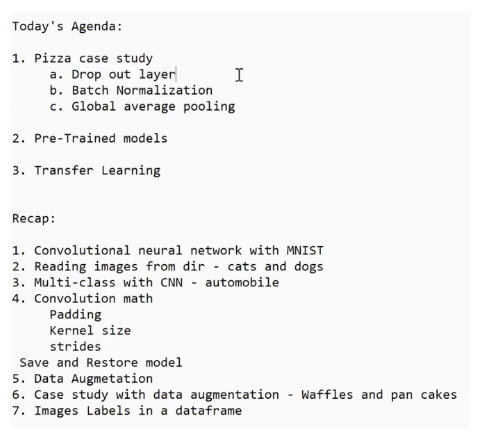

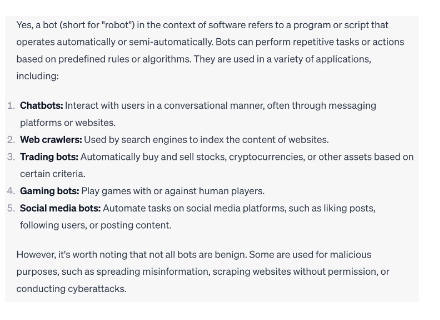

### Three concepts:

<font color=blue>
    
- Dropout layer
- Batch Normalization
- Global Average Pooling

### 1. Dropout layer

It is not something specific to CNN, it is a general neural n/w concept where we drop out some neurons during training process.

### 2. Batch Normalization

Make the outputs of every neuron standard normal.

### 3. Global Average Pooling

GAP  will in a way replace all ur flatten & hidden layers of ur neural n/w. Output of GAP can directly be fed to ur o/p layer & u can get the predictions.

## Keras (Frontend/high level API) & Tensorflow (Backend/where tensor operations, convolutions, optimization etc happen) 

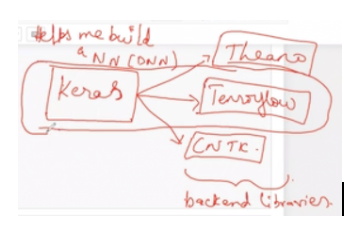

Yes, Keras is often described as a high-level neural networks API or frontend, while TensorFlow can serve as its backend. Let's break down what this means:

1. **Keras (Frontend):**
   - **High-Level API:** Keras provides a more user-friendly and intuitive way to define, train, and evaluate deep learning models. Its API abstracts many of the underlying details, making it easier for developers to build neural networks without getting bogged down in the intricacies of optimization algorithms, tensor operations, etc.
   - **Modularity:** Keras models are composed of building blocks (like layers) that can be connected in a straightforward manner.
   - **Predefined Layers:** Keras comes with a wide range of predefined layers, making it easy to create common neural network architectures.

2. **TensorFlow (Backend):**
   - **Low-Level Operations:** While Keras handles the high-level design and structure of models, TensorFlow takes care of the low-level operations like tensor multiplications, convolutions, and optimizations. This is the "backend" work that happens when a Keras model is trained or evaluated.
   - **Execution Engine:** When you run a Keras model, TensorFlow (or another backend, if specified) is the engine that executes the computations. It efficiently handles operations on GPUs or TPUs if available.
   - **Flexibility:** While Keras abstracts many details, TensorFlow offers the flexibility to define custom operations, gradients, and detailed control over the training process.

It's worth noting that the distinction between Keras as a frontend and TensorFlow as a backend has become a bit blurred. In 2017, Keras was integrated into TensorFlow as `tf.keras`, making it the official high-level API of TensorFlow. So, when people talk about "Keras" in the context of TensorFlow today, they are often referring to `tf.keras`.

However, **the original standalone Keras library was designed to be backend agnostic. This means that while TensorFlow was the most popular backend, Keras could also work with other backends like Theano or Microsoft Cognitive Toolkit (CNTK).** Over time, however, the standalone version of Keras became less common as the integrated `tf.keras` became the primary way to use Keras functionalities.

## Batch Normalization  - helps in faster convergence

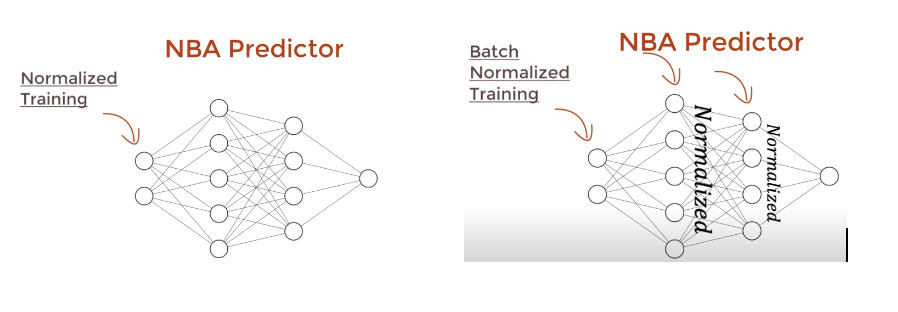

We call it batch normalization because we normalize values w.r.t. batch of images. 

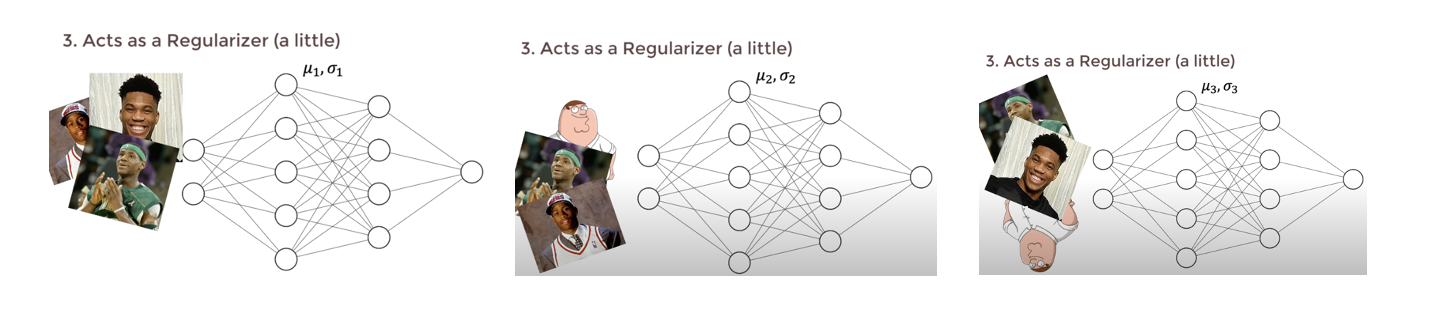

Above we have batch of 3, so after getting values of activations of 3 images we calculate their mean & variance & then based on that mean & variance we normalize each of the three images.

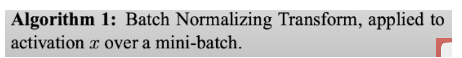

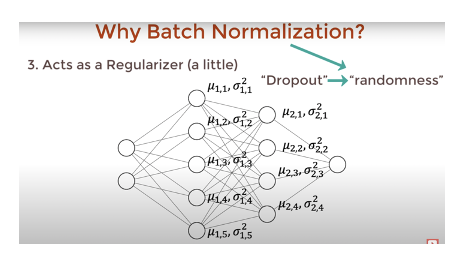

Academic Research paper-

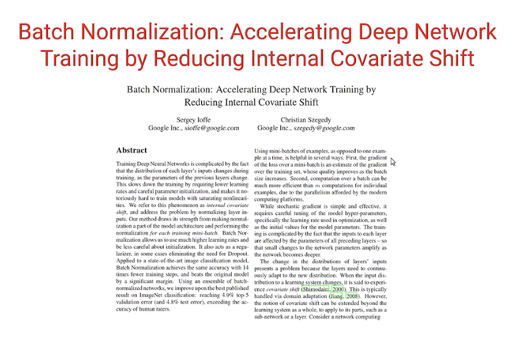

Batch normalization (often abbreviated as "BatchNorm") is a technique introduced in 2015 by Sergey Ioffe and Christian Szegedy to improve the training of deep neural networks. It addresses the problem of internal covariate shift by normalizing the output of each layer to have a mean of zero and a variance of one. This normalization process helps to stabilize and accelerate the training of deep networks.

Here's a step-by-step description of how batch normalization works:

1. **Normalization**:
    - For a given mini-batch of data, compute the mean and variance for each feature (or neuron output).
    - Normalize the outputs such that they have zero mean and unit variance using the calculated mean and variance:
    
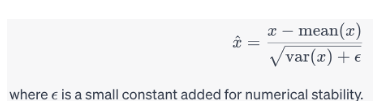   
    

2. **Scale and Shift**:
    - After normalization, the batch normalization layer introduces two learnable parameters for each feature: a scale parameter \( \gamma \) and a shift parameter \( \beta \). These parameters allow the network to recover the original data distribution if that's beneficial for the learning process:
   
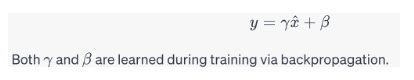


3. **During Inference**:
    - When using the network for inference (i.e., making predictions on new data), we can't compute the mean and variance for each mini-batch since we might be predicting for one sample at a time. Instead, we use a running average of the mean and variance computed during training to normalize the data.

Benefits of Batch Normalization:

- **Stabilizes Activation Distributions**: It reduces the internal covariate shift, which refers to the change in the distribution of layer outputs or activations as the network trains. By stabilizing these distributions, the later layers of the network have a more stable input distribution, making training more stable and faster.
  
- **Allows for Higher Learning Rates**: Normalization mitigates the risk of divergence during training, allowing for the use of higher learning rates.
  
- **Reduces Sensitivity to Weight Initialization**: Networks with batch normalization are less sensitive to the choice of weight initialization.
  
- **Provides Mild Regularization**: The normalization process can introduce some noise, especially when the mini-batch size is small. This can act as a form of regularization, helping to prevent overfitting.

Batch normalization has become a standard component in many deep network architectures due to the benefits it provides in training stability and convergence speed.

### Advantages of Batch Normalization

1. Increases speed of training
2. Decreases importance of initial weights
3. Regularizes model a little bit

### Where can Batch Normalization be applied?

Batch normalizaition can be applied to hidden layers in dense n/w as well as feature maps in cnn.

## Global Average Pooling, why the name Global ?

For instance, if the input to the global_average_pooling2d layer is of shape (17, 17, 64), it will compute the average of the 17 x 17 values for each of the 64 channels, producing an output of shape (64,).

The term "global" in global_average_pooling2d refers to the operation being applied over the entire spatial extent of the feature map, as opposed to "local" pooling operations like typical max pooling or average pooling layers, which operate over smaller, local regions of the feature map.

## Pre-trained Models

We just re-use some of the already trained models & we r going to make predictions. In Pre-trained models some of these advanced techniques like Dropout, Batch normalization, GAP might have been used to give u better performance.

### Input shape customizable for pre-trained models?

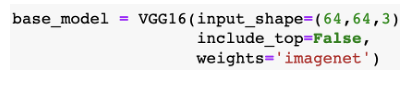

Yes, you can customize the input shape when using the VGG16 model (or most other pre-trained models) from frameworks like TensorFlow's Keras. The parameter `input_shape` allows you to specify the height, width, and number of channels for the input tensor.

However, there are a few things to keep in mind:

1. **Number of Channels**: The number of channels in your `input_shape` should match the number of channels the model was originally trained on. For VGG16, which was trained on RGB images from the ImageNet dataset, the number of channels should be 3. So, while you can adjust the height and width, you should generally keep the number of channels as 3 unless you have a strong reason to change it and understand the implications.

2. **Minimum Size**: While VGG16 is relatively flexible regarding input size, there's a minimum size required due to the repeated pooling operations in the architecture. If the spatial dimensions of the input are too small, it might not be possible to downsample the feature maps enough times, and you'll encounter an error. For VGG16, I believe the minimum height and width are both 32, but using such a small size might not yield meaningful features.

3. **Fine-tuning and Transfer Learning**: If you're using VGG16 for transfer learning and plan to fine-tune the model on a new dataset, it's essential to be aware of how changing the input size might affect the model's performance. Using an input size that's very different from the original (which is \(224 \times 224\) for VGG16) might require more extensive fine-tuning or adaptation.

In summary, yes, you can customize the input shape of the VGG16 model, but you should be aware of the constraints and implications of doing so.

## Hyperparameter Optimization for Neural Networks

Yes, hyperparameter tuning using methods like random search or grid search can be applied to neural networks. However, due to the complexity and long training times of many deep learning models, these methods can often be computationally expensive. As a result, several alternative strategies and tools have been developed for neural network hyperparameter tuning. Here are some of the common methods and tools:

1. **Random Search**: As you mentioned, random search involves randomly sampling hyperparameters from a predefined distribution. While it might sound unsophisticated, research has shown that random search can be more efficient than grid search, especially when the number of hyperparameters is large.

2. **Bayesian Optimization**: This method builds a probabilistic model of the function mapping from hyperparameter values to the objective to be optimized (e.g., validation accuracy). It then uses this model to select hyperparameters that are likely to perform well. Libraries like [Optuna](https://optuna.org/) and [Hyperopt](http://hyperopt.github.io/hyperopt/) can be used for Bayesian optimization.

3. **Gradient-based Optimization**: Some hyperparameters can be optimized using gradient-based methods, especially when the relationship between the hyperparameter and the model's performance is differentiable. 

4. **Population-based methods**: Algorithms like Population Based Training (PBT) evolve hyperparameters over time. PBT starts by training many neural networks in parallel with random hyperparameters. Over time, it copies the hyperparameters from the best models and perturbs them, allowing for an exploration of the hyperparameter space.

5. **Early Stopping**: To make the search more efficient, you can use early stopping. This means halting the training of models that don't show promise, which can save computational resources.

6. **Transfer Learning and Fine-tuning**: Instead of searching for the best architecture from scratch, start with a pre-trained model and fine-tune some of its layers or just the final layers to your specific task. This not only saves time but often requires fewer hyperparameters to tune.

7. **Learning Rate Schedulers**: Instead of keeping the learning rate constant or just using a simple decay, you can employ schedulers like the One Cycle Policy or the ReduceLROnPlateau scheduler. These adjust the learning rate based on conditions like epochs or validation performance, which can sometimes reduce the need for extensive hyperparameter tuning.

8. **Automated Machine Learning (AutoML) tools**: Tools like Google's [AutoML](https://cloud.google.com/automl), H2O's [AutoML](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html), and [Neural Designer](https://www.neuraldesigner.com/) can automate the process of hyperparameter tuning, feature engineering, and even model selection.

Remember that the "best" method for hyperparameter tuning often depends on the specific problem, dataset size, computational resources, and other factors. It's always a good idea to start simple, get a baseline model working, and then incrementally refine and expand the search as needed.

## References

1. https://www.youtube.com/watch?v=DtEq44FTPM4 - Batch normalization